In [1]:
import os
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, precision_recall_fscore_support
from torchvision.models import shufflenet_v2_x1_0

# Define paths to training and validation datasets
train_data_dir = r"C:\Users\HP\Downloads\train"
val_data_dir = r"C:\Users\HP\Downloads\val"

# Define data transformations
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder(train_data_dir, transform=data_transforms)
val_dataset = datasets.ImageFolder(val_data_dir, transform=data_transforms)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Define ShuffleNet model
model = shufflenet_v2_x1_0(pretrained=True)  # Pre-trained ShuffleNet model

# Modify the classifier to match the number of classes in your dataset
num_classes = len(train_dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Define learning rates
learning_rates = [0.0001]

for lr in learning_rates:
    print(f"\nLearning Rate: {lr}")
    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    # Training loop
    for epoch in range(30):  # Adjust number of epochs as needed
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0

        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
            train_loss += loss.item()

        train_accuracy = 100 * train_correct / train_total
        train_loss /= len(train_loader)

        # Validation loop
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        val_preds = []
        val_targets = []
              
        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

                val_preds.extend(predicted.cpu().numpy())
                val_targets.extend(labels.cpu().numpy())

                
            val_accuracy = 100 * val_correct / val_total
            val_loss /= len(val_loader)

            # Calculate precision, recall, F1-score, and support
            precision, recall, f1_score, support = precision_recall_fscore_support(val_targets, val_preds, average='weighted')
            print(f'Epoch {epoch + 1}: Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, '
                  f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%')
            print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1_score:.4f}, Support: {support}')

    print("Classification Report:")
    print(classification_report(val_targets, val_preds, target_names=train_dataset.classes))


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1`. You can also use `weights=ShuffleNet_V2_X1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Learning Rate: 0.0001
Epoch 1: Train Loss: 1.3339, Train Acc: 61.49%, Val Loss: 1.2236, Val Acc: 72.07%
Precision: 0.7502, Recall: 0.7207, F1-score: 0.6929, Support: None
Epoch 2: Train Loss: 1.0774, Train Acc: 77.26%, Val Loss: 0.8639, Val Acc: 75.78%
Precision: 0.7731, Recall: 0.7578, F1-score: 0.7137, Support: None
Epoch 3: Train Loss: 0.7586, Train Acc: 82.40%, Val Loss: 0.7049, Val Acc: 81.64%
Precision: 0.8171, Recall: 0.8164, F1-score: 0.8075, Support: None
Epoch 4: Train Loss: 0.5407, Train Acc: 88.14%, Val Loss: 0.5511, Val Acc: 84.77%
Precision: 0.8549, Recall: 0.8477, F1-score: 0.8491, Support: None
Epoch 5: Train Loss: 0.3961, Train Acc: 91.35%, Val Loss: 0.4651, Val Acc: 84.96%
Precision: 0.8597, Recall: 0.8496, F1-score: 0.8531, Support: None
Epoch 6: Train Loss: 0.2872, Train Acc: 94.07%, Val Loss: 0.4484, Val Acc: 84.38%
Precision: 0.8543, Recall: 0.8438, F1-score: 0.8477, Support: None
Epoch 7: Train Loss: 0.2004, Train Acc: 96.05%, Val Loss: 0.4366, Val Acc: 84.96%
P

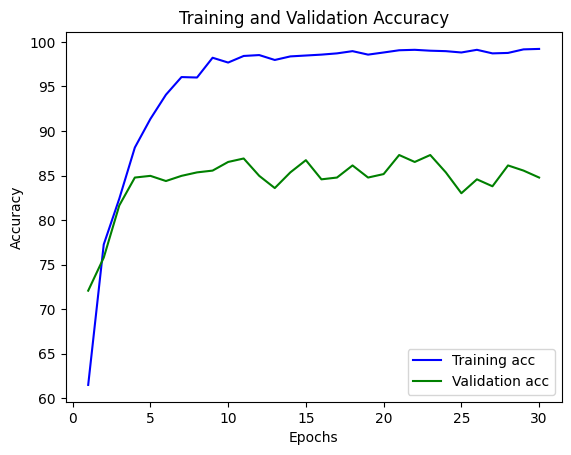

In [5]:
import matplotlib.pyplot as plt

# Define the accuracy values obtained during training
train_acc = [ 61.49,77.26,82.40,88.14,91.35,94.07,96.05,96.00,98.22,97.68,98.42,98.52,97.97,98.37,98.47, 98.57, 98.71, 98.96, 98.57,98.81,99.06, 99.11,99.01,98.96,98.81,99.11,98.71,98.76,99.16,99.21]
val_acc = [72.07,75.78,81.64,84.77,84.96,84.38,84.96,85.35,85.55,86.52,86.91,84.96,83.59,85.35,86.72,84.57,84.77,86.13,84.77,85.16,87.30,86.52,87.30 ,85.35,83.01,84.57,83.79,86.13,85.55,84.77]

# Define the number of epochs
epochs = range(1, len(train_acc) + 1)

# Plotting the training and validation accuracy with different colors
plt.plot(epochs, train_acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')  # Changed the color to green
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show plot
plt.show()


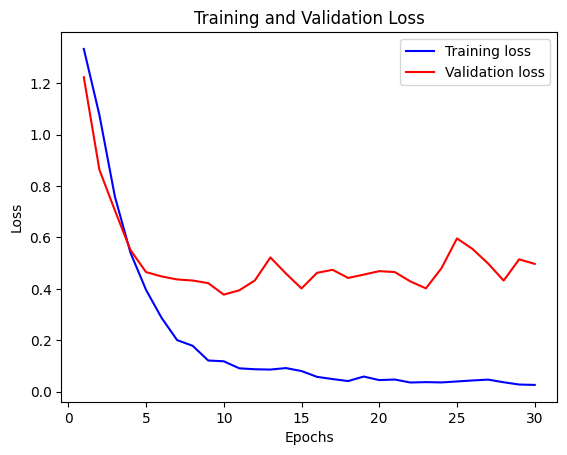

In [6]:
import matplotlib.pyplot as plt

# Define the loss values obtained during training
train_loss = [1.3339,1.0774,0.7586,0.5407,0.3961,0.2872,0.2004,0.1783,0.1211,0.1180,0.0906,0.0870,0.0858,0.0916,0.0800,0.0574,0.0488,0.0410,0.0586,0.0448,0.0470,0.0354,0.0369,0.0357,0.0395,0.0434,0.0467,0.0364,0.0275,0.0260]
val_loss = [1.2236,0.8639,0.7049,0.5511,0.4651,0.4484,0.4366,0.4323,0.4222,0.3774,0.3944,0.4327,0.5222,0.4595,0.4016,0.4624,0.4740,0.4424,0.4553,0.4689,0.4653,0.4289,0.4019,0.4801,0.5963,0.5551,0.4987,0.4322,0.5149,0.4971]

# Define the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plotting the training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show plot
plt.show()


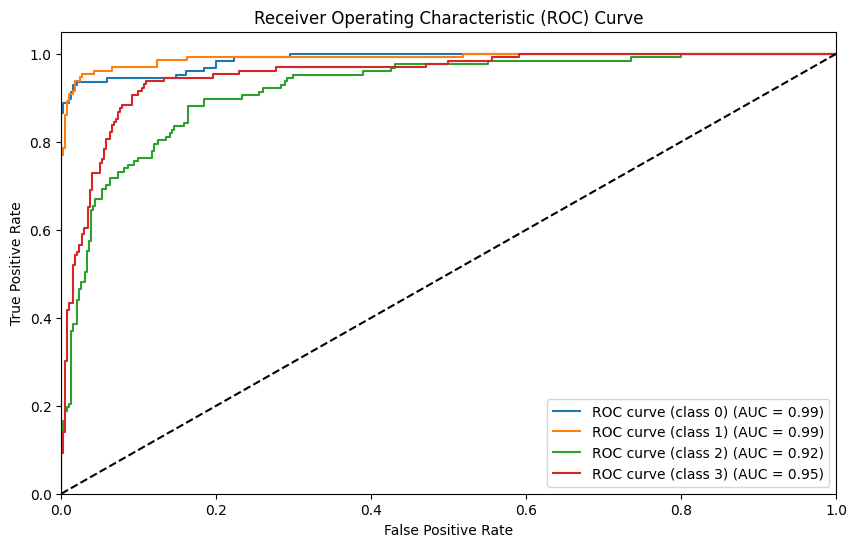

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate predicted probabilities for validation data
def get_predictions(model, val_loader):
    model.eval()
    val_probs = []
    val_targets = []

    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            softmax = nn.Softmax(dim=1)
            probabilities = softmax(outputs)
            val_probs.extend(probabilities.cpu().numpy())
            val_targets.extend(labels.cpu().numpy())

    val_probs = np.array(val_probs)
    val_targets = np.array(val_targets)

    return val_probs, val_targets

# Get predictions for validation data
val_probs, val_targets = get_predictions(model, val_loader)

# Compute ROC curve and AUC-ROC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(train_dataset.classes)):
    fpr[i], tpr[i], _ = roc_curve(val_targets == i, val_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 6))
for i in range(len(train_dataset.classes)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [9]:
import os
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, precision_recall_fscore_support
from torchvision.models import shufflenet_v2_x1_0

# Define paths to training and validation datasets
train_data_dir = r"C:\Users\HP\Downloads\train"
val_data_dir = r"C:\Users\HP\Downloads\val"

# Define data transformations
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder(train_data_dir, transform=data_transforms)
val_dataset = datasets.ImageFolder(val_data_dir, transform=data_transforms)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Define ShuffleNet model
model = shufflenet_v2_x1_0(pretrained=True)  # Pre-trained ShuffleNet model

# Modify the classifier to match the number of classes in your dataset
num_classes = len(train_dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Define learning rates
learning_rates = [0.0001]

for lr in learning_rates:
    print(f"\nLearning Rate: {lr}")
    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    # Training loop
    for epoch in range(30):  # Adjust number of epochs as needed
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0

        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
            train_loss += loss.item()

        train_accuracy = 100 * train_correct / train_total
        train_loss /= len(train_loader)

        # Validation loop
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        val_preds = []
        val_targets = []

        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

                val_preds.extend(predicted.cpu().numpy())
                val_targets.extend(labels.cpu().numpy())

            val_accuracy = 100 * val_correct / val_total
            val_loss /= len(val_loader)

            # Calculate precision, recall, F1-score, and support
            precision, recall, f1_score, support = precision_recall_fscore_support(val_targets, val_preds, average='weighted')
            print(f'Epoch {epoch + 1}: Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, '
                  f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%')
            print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1_score:.4f}, Support: {support}')

    print("Classification Report:")
    print(classification_report(val_targets, val_preds, target_names=train_dataset.classes))


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1`. You can also use `weights=ShuffleNet_V2_X1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Learning Rate: 0.0001
Epoch 1: Train Loss: 1.3278, Train Acc: 61.84%, Val Loss: 1.2131, Val Acc: 71.29%
Precision: 0.7199, Recall: 0.7129, F1-score: 0.6705, Support: None
Epoch 2: Train Loss: 1.0593, Train Acc: 79.19%, Val Loss: 0.8648, Val Acc: 73.44%
Precision: 0.7667, Recall: 0.7344, F1-score: 0.6857, Support: None
Epoch 3: Train Loss: 0.7516, Train Acc: 82.40%, Val Loss: 0.7119, Val Acc: 79.69%
Precision: 0.8003, Recall: 0.7969, F1-score: 0.7780, Support: None
Epoch 4: Train Loss: 0.5316, Train Acc: 87.20%, Val Loss: 0.5385, Val Acc: 84.18%
Precision: 0.8469, Recall: 0.8418, F1-score: 0.8395, Support: None
Epoch 5: Train Loss: 0.3885, Train Acc: 91.25%, Val Loss: 0.4376, Val Acc: 84.96%
Precision: 0.8540, Recall: 0.8496, F1-score: 0.8514, Support: None
Epoch 6: Train Loss: 0.2988, Train Acc: 94.17%, Val Loss: 0.4056, Val Acc: 84.57%
Precision: 0.8572, Recall: 0.8457, F1-score: 0.8498, Support: None
Epoch 7: Train Loss: 0.2053, Train Acc: 96.09%, Val Loss: 0.3924, Val Acc: 85.94%
P

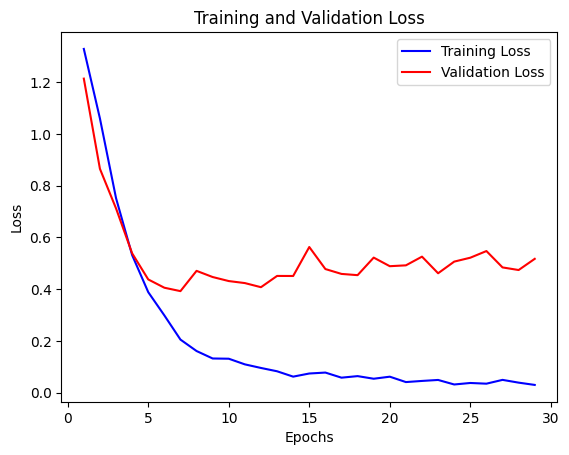

In [11]:
import matplotlib.pyplot as plt

# Define the loss values obtained during training and validation
train_loss = [ 1.3278,1.0593,0.7516,0.5316,0.3885,0.2988,0.2053,0.1611,0.1323,0.1314,0.1096,0.0957,0.0829,0.0622,0.0743,0.0779,0.0582,0.0642,0.0541,0.0620,0.0412,0.0456,0.0494,0.0319,0.0377,0.0350,0.0497,0.0390,0.0302]
val_loss = [1.2131,0.8648,0.7119,0.5385,0.4376, 0.4056,0.3924,0.4707,0.4469,0.4313,0.4235,0.4076,0.4511,0.4509,0.5628,0.4777,0.4589,0.4541,0.5219,0.4887,0.4920,0.5256,0.4614,0.5064,0.5215,0.5472,0.4840,0.4739,0.5171]

# Define the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plotting the training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show plot
plt.show()


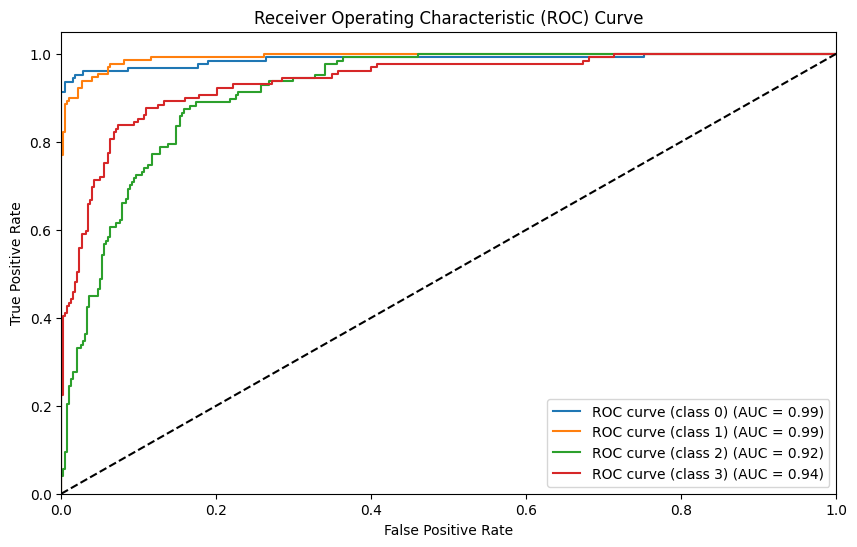

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate predicted probabilities for validation data
def get_predictions(model, val_loader):
    model.eval()
    val_probs = []
    val_targets = []

    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            softmax = nn.Softmax(dim=1)
            probabilities = softmax(outputs)
            val_probs.extend(probabilities.cpu().numpy())
            val_targets.extend(labels.cpu().numpy())

    val_probs = np.array(val_probs)
    val_targets = np.array(val_targets)

    return val_probs, val_targets

# Get predictions for validation data
val_probs, val_targets = get_predictions(model, val_loader)

# Compute ROC curve and AUC-ROC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(train_dataset.classes)):
    fpr[i], tpr[i], _ = roc_curve(val_targets == i, val_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 6))
for i in range(len(train_dataset.classes)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
    

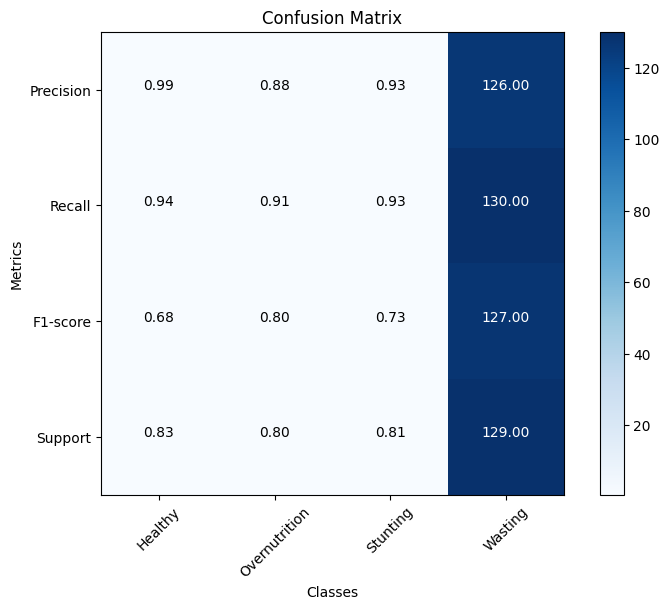

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
precision = [0.99, 0.94, 0.68, 0.83]
recall = [0.88, 0.91, 0.80, 0.80]
f1_score = [0.93, 0.93, 0.73, 0.81]
support = [126, 130, 127, 129]
class_names = ['Healthy', 'Overnutrition', 'Stunting', 'Wasting']

# Create the confusion matrix
conf_matrix = np.array([[precision[i], recall[i], f1_score[i], support[i]] for i in range(len(class_names))])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, ['Precision', 'Recall', 'F1-score', 'Support'])

fmt = '.2f'
thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Metrics')
plt.xlabel('Classes')
plt.show()

In [2]:
pip install flask


Note: you may need to restart the kernel to use updated packages.
